# Tema 5: Árboles de decisión
## Cuaderno de ejercicios

_Para facilitar la comprensión de los ejercicios no se ha implementado ningún algoritmo ni función para realizar los cálculos._

**Ejercicio 1**. Dado el conjuto de datos de la tabla (Buy Computer data), construir un árbol de decisión y predecir la clase para el siguiente ejemplo: age = joven, income=medium, student=yes, credit-rating=fair.

|id|age|income|student|credit_rating|Buy_Computer|
|---|---|---|---|---|---|
|1	|youth	|high	|no	|fair|	no|
|2	|youth	|high	|no	|excellent|	no|
|3	|middle_age|	high	|no	|fair|	yes|
|4	|senior	|medium	|no	|fair|	yes|
|5	|senior	|low	|yes	|fair|	yes|
|6	|senior|	low	|yes	|excellent|	no|
|7	|middle_age|	low	|yes|	excellent|	yes|
|8	|youth|	medium	|no	|fair|	no|
|9	|youth|	low	|yes|	fair	|yes|
|10	|senior|	medium|	yes|	fair|	yes|
|11	|youth|	medium	|yes	|excellent|	yes|
|12	|middle_age|	medium|	no	|excellent|	yes|
|13	|middle_age|	high	|yes|	fair|	yes|
|14	|senior|	medium	| no	|excellent|	no|

**Solución**.

Para construir el árbol de decisión tenemos que conocer cuáles son los atributos que proporcionan mayor ganancia de información en cada nivel. Esto nos servirá para dividir el conjunto de entrenamiento en base a dicho atributo. Por lo tanto,necesitamos calcular la ganancia de información esperada para clasificar el conjunto y la entropía de cada atributo. La ganancia de información esperada es esta información mutua menos la entropía:

The mutual information of the two classes I(SYes, SNo) = I(9,5)= -9/14 log2(9/14) – 5/14 log2(5/14)= 0.94

Ahora podemos calcular la ganancia de información de cada atributo. Tenemos que calcularlo para age, income, student y credit_rating.

- Age. Tenemos tres valores posibles age = youth (2 yes, 3 no)/middle_age(4 yes, 0 no)/senior(3 yes, 2 no)



In [ ]:
import math
# a * (b + c)
entropy_age_youth = (5/14) * (((-2/5) * math.log2(2/5)) + ((-3/5) * math.log2(3/5)))

In [ ]:
entropy_age_youth

In [ ]:
a = 5/14
b = (-2/5) * math.log2(2/5)
c = (-3/5) * math.log2(3/5)

In [ ]:
entropy_age_youth = a * (b + c)

In [ ]:
a = 5/14
b = (-3/5) * math.log2(3/5)
c = (-2/5) * math.log2(2/5)

In [ ]:
entropy_age_middle = (4/14)*0 
entropy_age_senior = a * (b + c)

In [ ]:
entropy_age = entropy_age_youth + entropy_age_middle + entropy_age_senior

In [ ]:
entropy_age

In [ ]:
gain_age = 0.94 - entropy_age
print(gain_age)

- Income. Tenemos tres valores posibles income = high (2 yes, 2 no)/medium(4 yes, 2 no)/low(3 yes, 1 no)

Se realizan los cálculos de manera similar a age, dando como resultado


In [ ]:
a = 4/14
b = (-2/4) * math.log2(2/4)
c = (-2/4) * math.log2(2/4)

In [ ]:
entropy_high = a * (b + c)

In [ ]:
a = 6/14
b = (-4/6) * math.log2(4/6)
c = (-2/6) * math.log2(2/6)

In [ ]:
entropy_medium = a * (b + c)

In [ ]:
a = 4/14
b = (-3/4) * math.log2(3/4)
c = (-1/4) * math.log2(1/4)

In [ ]:
entropy_low = a * (b + c)

In [ ]:
entropy_income = entropy_high + entropy_medium + entropy_low
gain_income = 0.94 - entropy_income
print(gain_income)

- Student. Tenemos dos valores posibles student = yes (6 yes, 1 no)/ no(3 yes, 4 no)

Se realizan los cálculos de manera similar a age, dando como resultado: gain_student = 0.1516

- Credit_rating. Tenemos dos posibles valores credit_rating = fair (6 yes, 2 no) / excellent (3 yes / 3 no)

Se realizan los cálculos de manera similar a los anteriores, dando como resultado: gain_credit_rating = 0.0479

De todas las ganancias de información, la que tiene mayor valor es la de AGE, por lo tanto ese será el atributo con el que se realizará la primera partición de datos, dando como resultado el siguiente árbol.

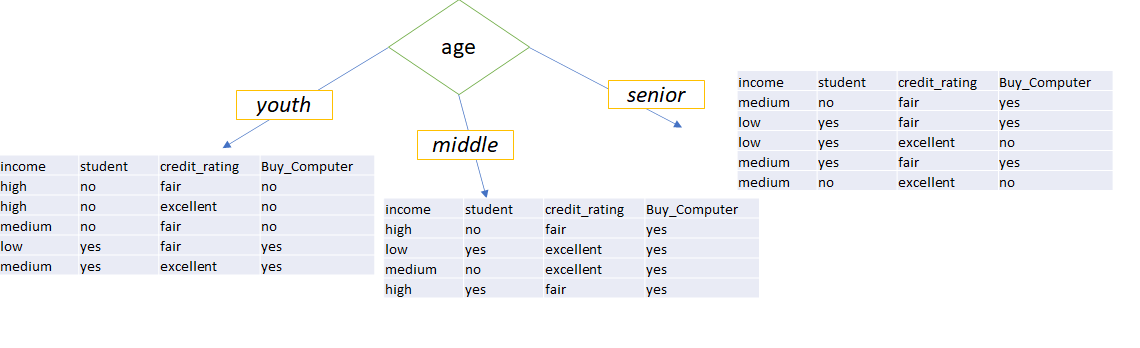


Si obser vamos este árbol, veremos que en la rama correspondiente a age = middle, todas las clases son YES, por lo tanto podemos sustitur la hoja por class = YES.

En el resto de nodos debemos volver a particionar los datos. Se repite el mismo proceso de calcular la ganancia de información para cada atributo.

Para el nodo `youth` hay que calcular la ganancia de los atributos: income, student y credit_rating

I(Syes, Sno) = I(2,3) = -2/5log2(2/5) - 3/5log2(3/5) = 0.97

Repetimos los cálculos de la sección anterior y obtenemos:
gain_income = 0.57
gain_student = 0.97

y no haría falta calcular la última ganancia de información porque ya hemos obtenido un valor máximo para student. Se utiliza dicho valor para particionar, y el resultado del particionado de esa rama sería:

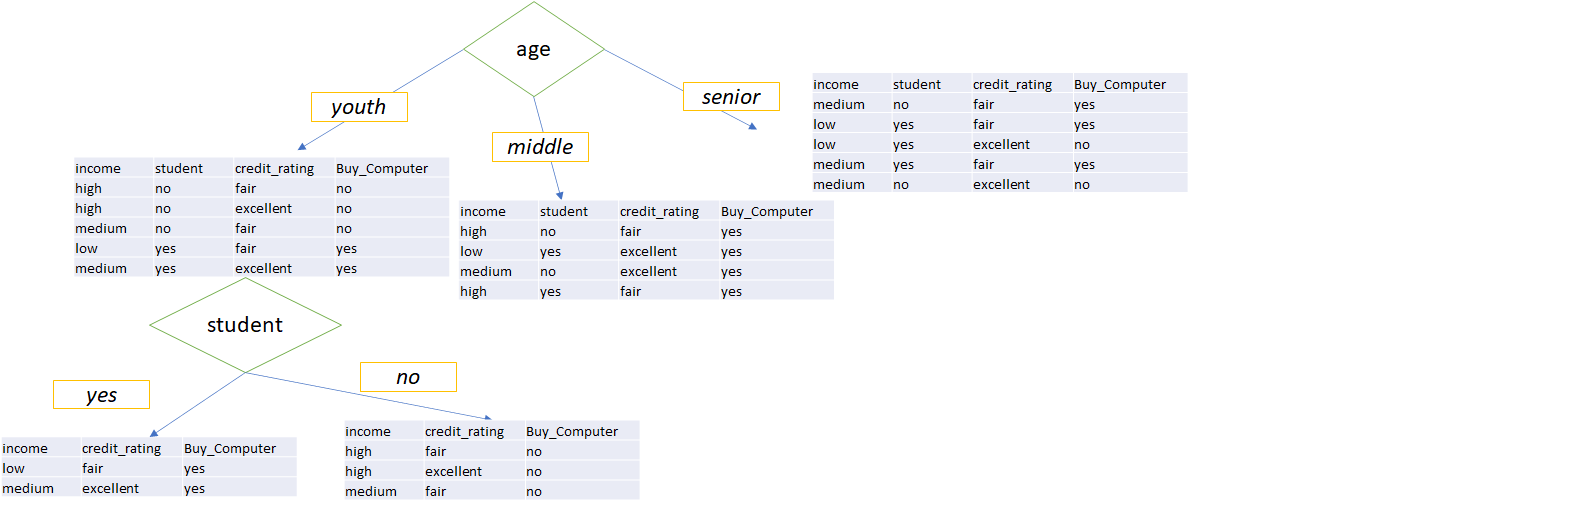

Si observamos las particiones vemos que cada nodo puede ser hoja, ya que las clases son similares. Por lo tanto transformames la partición student = yes en Class = YES y student = no en Class = NO

Finalmente nos queda particionar el nodo age = senior. Seguimos el mismo proceso que antes.

I (Syes, Sno) = I (3, 2) = 0.97

Hay que calcular la ganancia de información de income, student y credit_rating en este caso. Importante, aunque sean los mismos atributos que en la rama anterior, los valores no tienen por qué coincidir porque las probabilidades cambian.

gain_income = 0.02
gain_student = 0.02
gain_credit_rating = 0.97

La máxima ganancia de información nos la da el atributo credit_rating. El particionado quedaría de la siguiente manera.


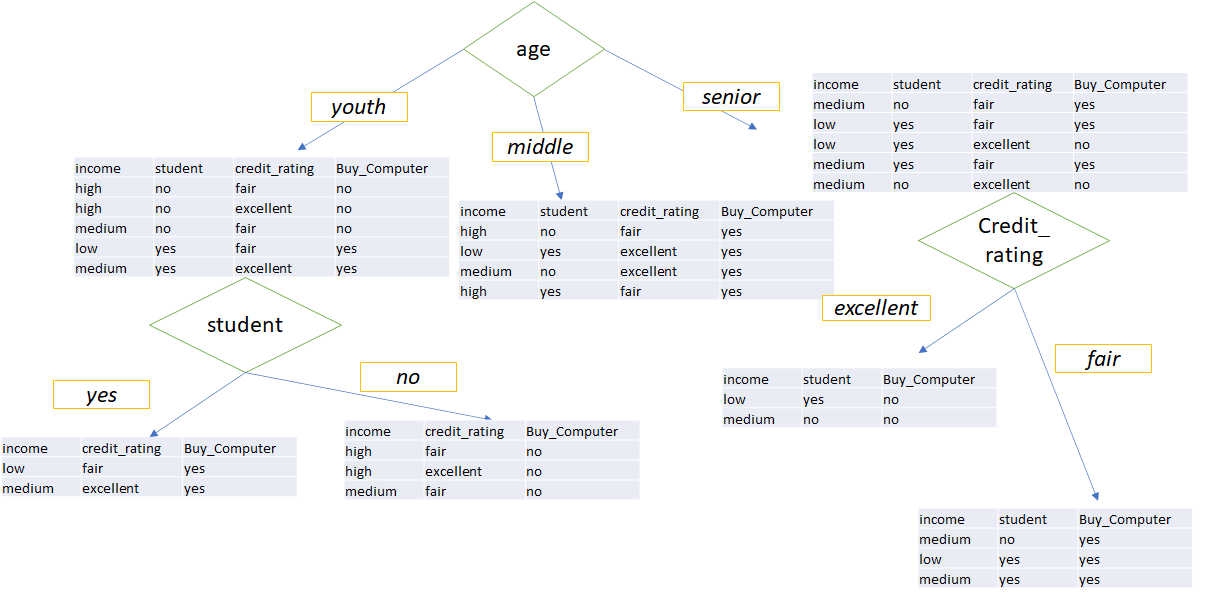

En este caso tranformamos en hoja, credit_rating = excellent en class = NO y credit_rating = fair en class =YES

El árbol de decisión resultante sería de la siguiente manera:

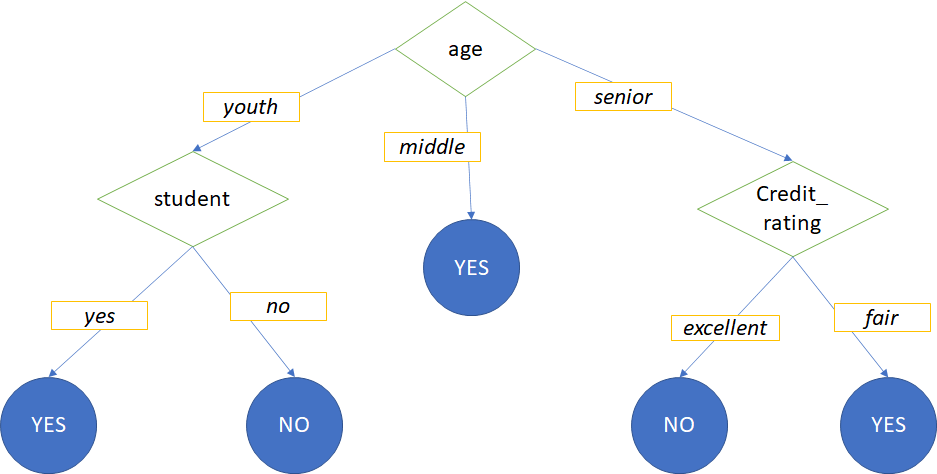

**Ejercicio 2.** Considere una tarea de clasificación de dos categorías con los siguientes datos de  entrenamiento:

|attr1| attr2 |attr3| attr4| class|
|---|---|---|---|---|
|a |1 |c |-1 |c1|
|b |0 |c |-1 |c1|
|a |0 |c |1 |c1|
|b |1 |c |1 |c1|
|b |0 |c |1 |c2|
|a |0| a |-1 |c2|
|a |1 |a |-1 |c2|
|b |1 |c |-1 |c2|

Construya un árbol de decisión completo (sin podar) para estos datos usando la ganancia de información como criterio de división. Mostrar todos los cálculos de entropía

In [2]:
import math

I_class = - 4/8 * math.log2(4/8) - 4/8 * math.log2(4/8)

In [3]:
I_class

1.0

In [5]:
# dos posible valores, a (c1 2 y c2 2) y b (c1 2 y c2 2)
entropy_att1 = (4/8 * ((-2/4) * math.log2(2/4)- (2/4)* math.log2(2/4))) + (4/8 * ((-2/4) * math.log2(2/4)- (2/4)* math.log2(2/4)))
gain_att1 = I_class - entropy_att1
print(gain_att1)

0.0


In [6]:
# dos posible valores, 1 (c1 2 y c2 2) y 0 (c1 2 y c2 2)
entropy_att2 = (4/8 * ((-2/4) * math.log2(2/4)- (2/4)* math.log2(2/4))) + (4/8 * ((-2/4) * math.log2(2/4)- (2/4)* math.log2(2/4)))
gain_att2 = I_class - entropy_att2
print(gain_att2)

0.0


In [8]:
# dos posible valores, c (c1 4 y c2 2) y a (c1 0 y c2 2)

entropy_att3 = (6/8 * ((-4/6) * math.log2(4/6)- (2/6)* math.log2(2/6))) + (2/8 * ((-0/2) * 0- (2/42)* math.log2(2/2)))
gain_att3 = I_class - entropy_att3
print(gain_att3)

0.31127812445913283


In [9]:
# dos posible valores, -1 (c1 2 y c2 3) y 1 (c1 2 y c2 1)

entropy_att4 = (5/8 * ((-2/5) * math.log2(2/5)- (3/5)* math.log2(3/5))) + (3/8 * ((-2/3) * math.log2(2/3)- (1/3)* math.log2(1/3)))
gain_att4 = I_class - entropy_att4
print(gain_att4)

0.04879494069539847


La mayor ganancia de información en el primer nivel es att3.

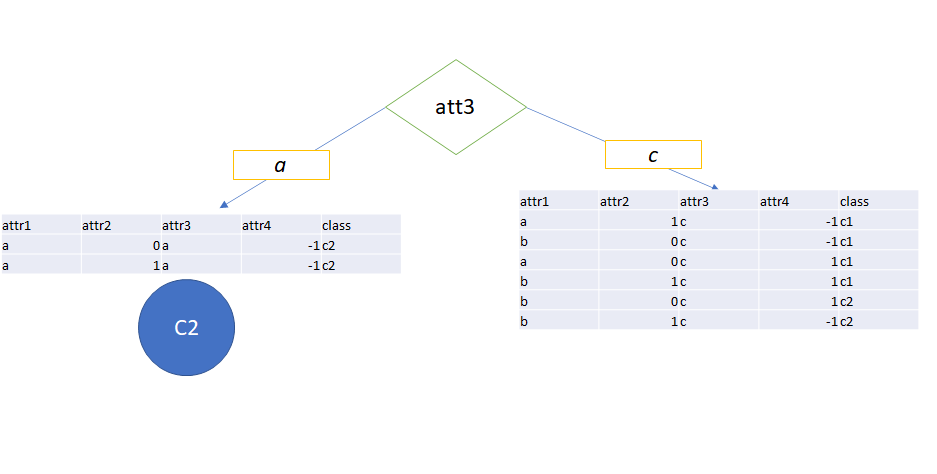

La rama de la partición con att3 = a se convierte en hoja class = C2. Seguimos particionando por la rama att3 = 3. Hay que calcular la ganancia de información de los siguientes atributos
gain_att1, gain_att2, gain_att4



In [12]:
I_class = (- (4/6) * math.log2(4/6)) - (2/6 * math.log2(2/6))
# dos posible valores, a (c1 2 y c2 0) y b (c1 2 y c2 2)
entropy_att1 = (2/6 * ((-2/2) * math.log2(2/2)- 0)) + (4/6 * ((-2/4) * math.log2(2/4)- (2/4)* math.log2(2/4)))
gain_att1 = I_class - entropy_att1
print(gain_att1)


0.2516291673878229


In [13]:
# dos posible valores, 1 (c1 2 y c2 1) y 0 (c1 2 y c2 0)
entropy_att2 = (34/5 * ((-2/3) * math.log2(2/3)- (1/3)* math.log2(1/3))) + (2/5 * ((-2/2) * math.log2(2/2)- 0))
gain_att2 = I_class - entropy_att2
print(gain_att2)

-5.3261158375160385


In [14]:
# dos posible valores, -1 (c1 2 y c2 1) y 1 (c1 2 y c2 1)

entropy_att4 = (3/6 * ((-2/3) * math.log2(2/3)- (1/3)* math.log2(1/3))) + (3/6 * ((-2/3) * math.log2(2/3)- (1/3)* math.log2(1/3)))
gain_att4 = I_class - entropy_att4
print(gain_att4)

0.0


La máxima ganancia de información la da el atributo att1.

La partición quedaría de la siguiente manera:

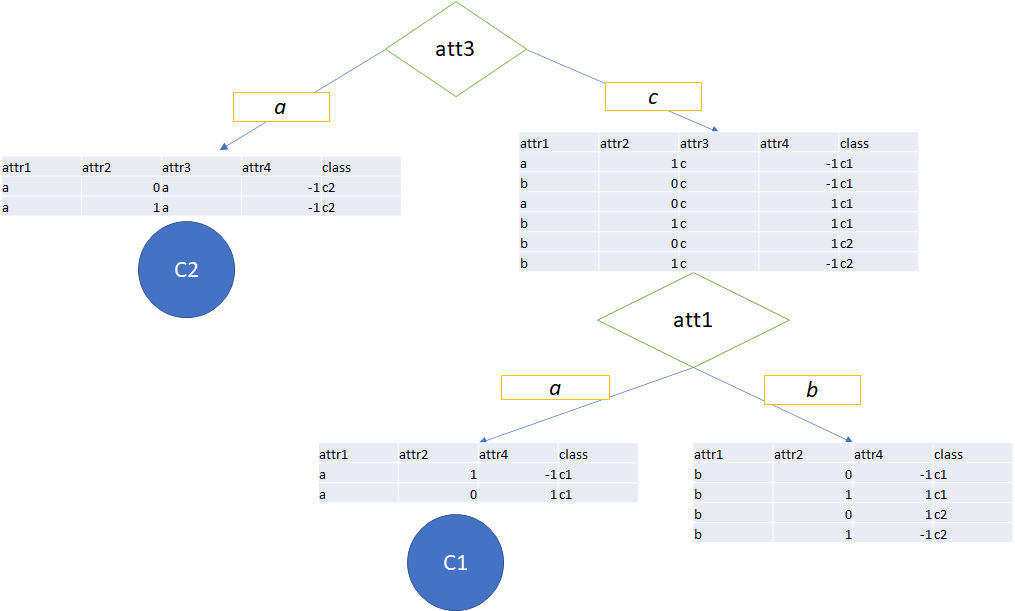

La partición con el atributo att1= a da como resultado una hoja, class = C1. Quedaría seguir particionando por la rama de att1= b.

Hay que calcular la ganancia de información de los siguientes atributos
gain_att2, gain_att4

En estos dos casos no haría falta hacer cálculos porque vemos que la representación de instancias en ambos casos es de 1 de cada variable y combinación, sabemos que cada atributo nos propociona 0 de ganancia de información. Esto significa que no hay uno mejor que otro. Nuestro criterio entonces de implementación será seleccionar el siguiente atributo por orden de presentación, es decir att2. Dando como resultado al siguiente árbol.

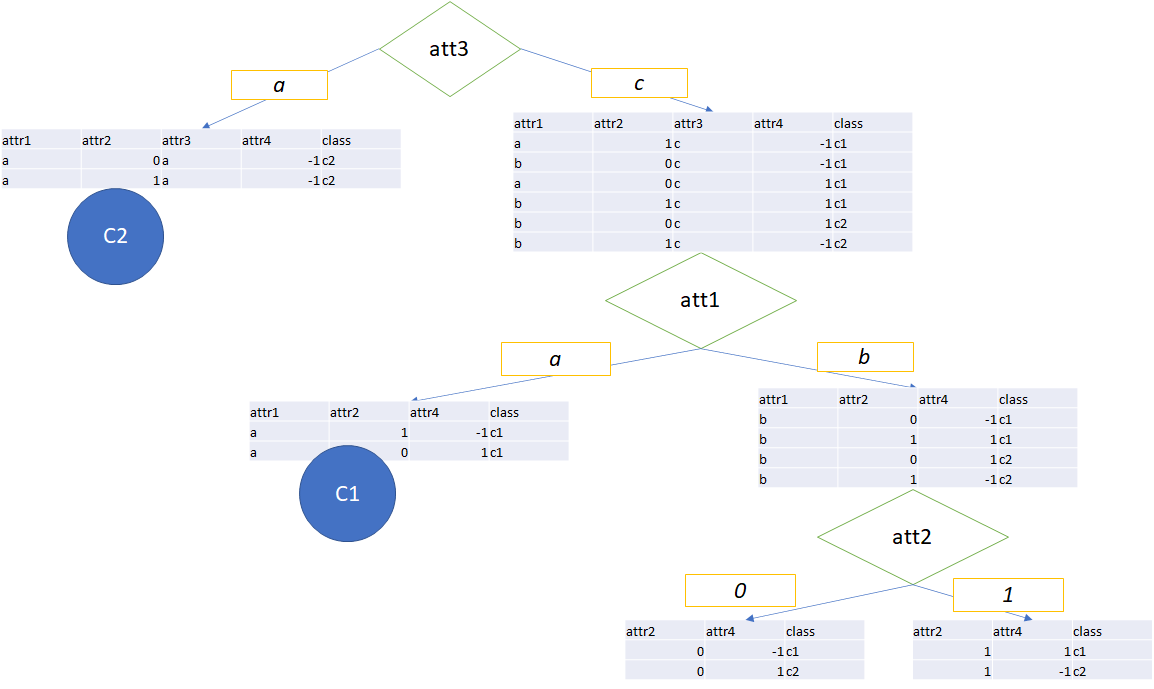

En este árbol vemos que la siguiente partición tendrá que ser por att4, dando como resultado al árbol final.

In [15]:
# adaptar con implementación en Python: https://towardsdatascience.com/entropy-and-information-gain-in-decision-trees-c7db67a3a293

0.0
